# Проект e-learning

_Учебный курс — серия учебных занятий, идущая по плану и расписанию, нацеленная на обучение одному учебному предмету.
Из этих соображений курсом считается предмет 'code_module'.
Под экзаменом подразумевается 'assessment_type' = 'Exam'_

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_assessments = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-anas-volkova/Project_e-learning/assessments.csv')
df_courses = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-anas-volkova/Project_e-learning/courses.csv')
df_studentAssessment = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-anas-volkova/Project_e-learning/studentAssessment.csv')
df_studentRegistration = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-anas-volkova/Project_e-learning/studentRegistration.csv')

### Анализ исходных данных

In [3]:
df_assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [4]:
df_assessments.shape

(206, 6)

In [5]:
df_assessments.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [6]:
df_assessments.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

In [7]:
df_assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [8]:
df_courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [9]:
df_courses.dtypes

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

In [10]:
df_courses.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

In [11]:
df_courses.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [12]:
df_studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [13]:
df_studentAssessment.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

In [14]:
df_studentAssessment.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
dtype: int64

In [15]:
df_studentAssessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [16]:
df_studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [17]:
df_studentRegistration.dtypes

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

In [18]:
df_studentRegistration.nunique()

code_module                7
code_presentation          4
id_student             28785
date_registration        332
date_unregistration      416
dtype: int64

In [19]:
df_studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [3]:
DF = df_assessments.merge(df_studentAssessment, on='id_assessment') #Join таблица1 и таблица3

In [5]:
DF.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0


In [22]:
DF.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
id_student             int64
date_submitted         int64
is_banked              int64
score                float64
dtype: object

In [23]:
DF.nunique()

code_module              7
code_presentation        4
id_assessment          188
assessment_type          3
date                    72
weight                  24
id_student           23369
date_submitted         312
is_banked                2
score                  101
dtype: int64

In [4]:
DF_exam = DF.query("assessment_type == 'Exam'").reset_index(drop=True)

In [8]:
DF_exam.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
1,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
2,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
3,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
4,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0


In [26]:
DF_exam.nunique()

code_module             2
code_presentation       4
id_assessment           6
assessment_type         1
date                    3
weight                  1
id_student           4633
date_submitted         25
is_banked               1
score                  68
dtype: int64

In [5]:
DF_success_exam = DF.query("assessment_type == 'Exam' and score >= 40.0").reset_index(drop=True)

In [10]:
DF_success_exam.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
1,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
2,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
3,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
4,CCC,2014B,24290,Exam,NaN,100.0,560494,230,0,92.0


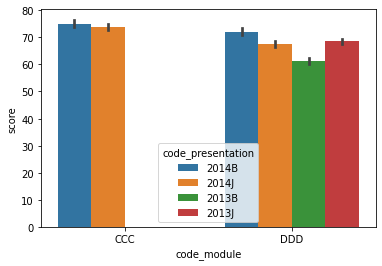

In [14]:
sns.barplot(x="code_module", y="score", data=DF_success_exam, hue='code_presentation')

In [118]:
DF_success_exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        4392 non-null   object 
 1   code_presentation  4392 non-null   object 
 2   id_assessment      4392 non-null   int64  
 3   assessment_type    4392 non-null   object 
 4   date               1867 non-null   float64
 5   weight             4392 non-null   float64
 6   id_student         4392 non-null   int64  
 7   date_submitted     4392 non-null   int64  
 8   is_banked          4392 non-null   int64  
 9   score              4392 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 343.2+ KB


In [29]:
DF_success_exam.nunique()

code_module             2
code_presentation       4
id_assessment           6
assessment_type         1
date                    3
weight                  1
id_student           4097
date_submitted         24
is_banked               1
score                  43
dtype: int64

------

## Вопрос 1. Сколько студентов успешно сдали только один курс?

In [81]:
Question1 = DF_success_exam.groupby('id_student', as_index=False) \
                .agg({'code_module':'count'}) \
                .rename(columns={'code_module':'count_code_module'}) \
                .query('count_code_module == 1')

In [82]:
Question1.head()

,id_student,count_code_module
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1


In [83]:
Question1.nunique()

id_student           3802
count_code_module       1
dtype: int64

In [84]:
Answer_Question1 = Question1.shape[0]
Answer_Question1

3802

In [85]:
print('Ответ на вопрос №1: ', Answer_Question1)

Ответ на вопрос №1:  3802


------------

## Вопрос 2. Выявить самый сложный и самый простой экзамен

In [58]:
DF['code_module'].unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [59]:
DF.query("is_banked == 1").head() #нет перезачитанных экзаменов assessment_type == 'Exam'

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
1641,AAA,2014J,1758,TMA,19.0,10.0,603861,-1,1,61.0
1685,AAA,2014J,1758,TMA,19.0,10.0,1970390,-1,1,78.0
1690,AAA,2014J,1758,TMA,19.0,10.0,2073016,-1,1,60.0
1693,AAA,2014J,1758,TMA,19.0,10.0,2139353,-1,1,65.0
1708,AAA,2014J,1758,TMA,19.0,10.0,2358969,-1,1,68.0


In [61]:
DF_exam.head() #отсутствуют данные в studentAssessment по сдаче экзаменов по предметам AAA, BBB, EEE, FFF, GGG

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
1,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
2,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
3,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
4,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0


In [62]:
DF['assessment_type'].unique()

array(['TMA', 'CMA', 'Exam'], dtype=object)

In [86]:
Question2_1 = DF_exam.groupby('id_assessment', as_index=False) \
                .agg({'id_student':'count'}) \
                .rename(columns={'id_student':'count_id_student'})

Question2_1.head()

,id_assessment,count_id_student
0,24290,747
1,24299,1168
2,25340,602
3,25354,968
4,25361,524


In [87]:
Question2_2 = DF_success_exam.groupby(['code_module', 'id_assessment'], as_index=False) \
                .agg({'id_student':'count'}) \
                .rename(columns={'id_student':'count_id_student_success'})
 
Question2_2

,code_module,id_assessment,count_id_student_success
0,CCC,24290,664
1,CCC,24299,1019
2,DDD,25340,504
3,DDD,25354,878
4,DDD,25361,485
5,DDD,25368,842


In [88]:
Question2 = Question2_2.merge(Question2_1, on='id_assessment')
Question2['completeness'] = Question2.count_id_student_success/Question2.count_id_student

Question2

,code_module,id_assessment,count_id_student_success,count_id_student,completeness
0,CCC,24290,664,747,0.888889
1,CCC,24299,1019,1168,0.872432
2,DDD,25340,504,602,0.837209
3,DDD,25354,878,968,0.907025
4,DDD,25361,485,524,0.925573
5,DDD,25368,842,950,0.886316


In [89]:
Question2.describe()

,id_assessment,count_id_student_success,count_id_student,completeness
count,6.000000,6.000000,6.000000,6.000000
mean,25002.000000,732.000000,826.500000,0.886240
std,548.112762,216.056474,244.999388,0.030268
min,24290.000000,485.000000,524.000000,0.837209
25%,24559.250000,544.000000,638.250000,0.875903
50%,25347.000000,753.000000,848.500000,0.887602
75%,25359.250000,869.000000,963.500000,0.902491
max,25368.000000,1019.000000,1168.000000,0.925573


In [90]:
Question2.query('completeness == @Question2.completeness.min()')

,code_module,id_assessment,count_id_student_success,count_id_student,completeness
2,DDD,25340,504,602,0.837209


In [91]:
Question2.query('completeness == @Question2.completeness.max()')

,code_module,id_assessment,count_id_student_success,count_id_student,completeness
4,DDD,25361,485,524,0.925573


**Ответ:** самая низкая завершаемость: DDD 25340; самая высокая завершaемость: DDD 25361 

----------

## Вопрос 3. Определить средний срок сдачи экзаменов

In [6]:
DF_success_exam_max_date_submitted = DF_success_exam.groupby(['id_student', 'code_module'], as_index=False) \
                                                    .agg({'date_submitted':'max'}) \
                                                    .rename(columns={'date_submitted':'max_date_submitted'})
DF_success_exam_max_date_submitted.head() # Определяем сроки последней сдачи

,id_student,code_module,max_date_submitted
0,23698,CCC,243
1,24213,DDD,236
2,27116,CCC,243
3,28046,DDD,237
4,28787,CCC,243


In [7]:
DF_success_exam_full = DF_success_exam.merge(DF_success_exam_max_date_submitted, on=['id_student', 'code_module'], how='left')

In [8]:
DF_success_exam_full.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,max_date_submitted
0,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0,234
1,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0,230
2,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0,230
3,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0,234
4,CCC,2014B,24290,Exam,NaN,100.0,560494,230,0,92.0,230


In [117]:
#DF_success_exam_full.query('date_submitted != max_date_submitted') #проверка

In [9]:
Question3 = DF_success_exam_full.groupby('code_module', as_index=False) \
                .agg({'max_date_submitted':'mean'}) \
                .rename(columns={'max_date_submitted':'mean_date_submitted'})
Question3

,code_module,mean_date_submitted
0,CCC,239.345217
1,DDD,237.980805


**Ответ:** Средний срок сдачи экзамена ССС: 239 дней; экзамена DDD: 238 дней с начала семестра.

--------

## Вопрос 4. Выявить самые популярные предметы (ТОП-3) по количеству регистраций на них, а также предметы с самым большим оттоком (ТОП-3).

#### Выявление ТОП-3 популярных предмета

In [96]:
Question4_1 = df_studentRegistration.query("date_registration != 'NaN'") \
                .groupby('code_module', as_index=False) \
                .agg({'id_student':'nunique'}) \
                .rename(columns={'id_student':'count_registration'}) \
                .sort_values('count_registration', ascending=False) \
                .reset_index(drop=True)

Question4_1.head(3)

,code_module,count_registration
0,BBB,7683
1,FFF,7387
2,DDD,5840


#### Выявление ТОП-3 предмета с самым большим оттоком

In [97]:
df_studentRegistration_first_date_registration = df_studentRegistration.query("date_registration != 'NaN'") \
                                                            .groupby(['id_student', 'code_module'], as_index=False) \
                                                            .agg({'date_registration':'min'}) \
                                                            .rename(columns={'date_registration':'first_date_registration'})
df_studentRegistration_first_date_registration.head() #Выявили первую дату регистрации для каждого студента на каждый курс 

,id_student,code_module,first_date_registration
0,3733,DDD,-68.0
1,6516,AAA,-52.0
2,8462,DDD,-137.0
3,11391,AAA,-159.0
4,23629,BBB,-47.0


In [98]:
df_studentRegistration_CD = df_studentRegistration.drop(columns=['code_presentation', 'date_registration'])
df_studentRegistration_CD.head() #Убрали неактуальные данные для данного вопроса

,code_module,id_student,date_unregistration
0,AAA,11391,NaN
1,AAA,28400,NaN
2,AAA,30268,12.0
3,AAA,31604,NaN
4,AAA,32885,NaN


In [99]:
final_df_studentRegistration = df_studentRegistration_first_date_registration.merge(df_studentRegistration_CD, on=['id_student', 'code_module'], how='left')
final_df_studentRegistration.head()

,id_student,code_module,first_date_registration,date_unregistration
0,3733,DDD,-68.0,-8.0
1,6516,AAA,-52.0,NaN
2,8462,DDD,-137.0,119.0
3,8462,DDD,-137.0,18.0
4,11391,AAA,-159.0,NaN


In [100]:
final_df_studentRegistration.isna().sum()

id_student                     0
code_module                    0
first_date_registration        0
date_unregistration        22515
dtype: int64

In [101]:
Question4_2 = final_df_studentRegistration.query("date_unregistration != 'NaN'") \
                .groupby('code_module', as_index=False) \
                .agg({'id_student':'nunique'}) \
                .rename(columns={'id_student':'count_unregistration'}) \
                .sort_values('count_unregistration', ascending=False) \
                .reset_index(drop=True)

Question4_2.head(3)

,code_module,count_unregistration
0,BBB,2306
1,FFF,2240
2,DDD,2059


**Ответ:**
самые популярные курсы BBB, FFF, DDD; 
курсы с самым большим оттоком BBB, FFF, DDD

-----

## Вопрос 5. В период с начала 2013 по конец 2014 выявить семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов

In [102]:
DF.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0


In [103]:
DF['code_presentation'].unique() # в таблице представлены только 2013 и 2014 гг

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

In [104]:
DF.query("is_banked == 1").head() #нет перезачтенных экзаменов для assessment_type == 'Exam'

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
1641,AAA,2014J,1758,TMA,19.0,10.0,603861,-1,1,61.0
1685,AAA,2014J,1758,TMA,19.0,10.0,1970390,-1,1,78.0
1690,AAA,2014J,1758,TMA,19.0,10.0,2073016,-1,1,60.0
1693,AAA,2014J,1758,TMA,19.0,10.0,2139353,-1,1,65.0
1708,AAA,2014J,1758,TMA,19.0,10.0,2358969,-1,1,68.0


In [105]:
DF_success_exam_count = DF_success_exam.groupby(['code_module', 'code_presentation', 'date_submitted'], as_index=False) \
                                    .agg({'id_student':'count'}) \
                                    .rename(columns={'id_student':'count_id_student_success'})
 
DF_success_exam_count.head()

,code_module,code_presentation,date_submitted,count_id_student_success
0,CCC,2014B,230,432
1,CCC,2014B,234,195
2,CCC,2014B,236,25
3,CCC,2014B,237,8
4,CCC,2014B,238,2


In [106]:
DF_exam_count = DF_exam.groupby(['code_module', 'code_presentation', 'date_submitted'], as_index=False) \
                .agg({'id_student':'count'}) \
                .rename(columns={'id_student':'count_id_student'})

DF_exam_count.head()

,code_module,code_presentation,date_submitted,count_id_student
0,CCC,2014B,230,481
1,CCC,2014B,234,222
2,CCC,2014B,236,30
3,CCC,2014B,237,9
4,CCC,2014B,238,2


In [107]:
Question5 = DF_success_exam_count.merge(DF_exam_count, on=['code_module', 'code_presentation', 'date_submitted'])
Question5['completeness'] = Question5.count_id_student_success/Question5.count_id_student
Question5.head()

,code_module,code_presentation,date_submitted,count_id_student_success,count_id_student,completeness
0,CCC,2014B,230,432,481,0.898129
1,CCC,2014B,234,195,222,0.878378
2,CCC,2014B,236,25,30,0.833333
3,CCC,2014B,237,8,9,0.888889
4,CCC,2014B,238,2,2,1.000000


In [108]:
Question5.query("completeness == @Question5.completeness.min()")

,code_module,code_presentation,date_submitted,count_id_student_success,count_id_student,completeness
33,DDD,2014B,237,5,8,0.625


In [109]:
Question5_2 = Question5.groupby('code_presentation', as_index=False) \
                .agg({'date_submitted':'mean'}) \
                .rename(columns={'date_submitted':'mean_date_submitted'}) \
                .sort_values('mean_date_submitted', ascending=False) \
                .reset_index(drop=True)
Question5_2.head(1)

,code_presentation,mean_date_submitted
0,2014J,251.684211


**Ответ:**
- семестр с самой низкой завершаемостью курсов: 2014B;
- семестр с самыми долгими средними сроками сдачи курсов: 2014J    

---------------

## Вопрос 6. Построить адаптированные RFM-кластеры студентов

- R - среднее время сдачи одного экзамена
- F - завершаемость курсов 
- M - среднее количество баллов, получаемое за экзамен

In [110]:
DF_exam.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
1,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
2,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
3,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
4,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0


In [111]:
DF_exam.id_student.nunique() # Всего 4633 студентов сдавших экзамены

4633

### R - среднее время сдачи одного экзамена

In [112]:
R_df = DF_exam.groupby('id_student', as_index=False) \
                .agg({'date_submitted':'mean'}) \
                .rename(columns={'date_submitted':'mean_date_submitted'})
R_df.head()

,id_student,mean_date_submitted
0,23698,243.0
1,24213,236.0
2,27116,243.0
3,28046,237.0
4,28787,243.0


In [113]:
R_df.shape

(4633, 2)

### F - завершаемость курсов

In [114]:
Students_exam = DF_exam.groupby('id_student', as_index=False) \
                        .agg({'id_assessment':'count'}) \
                        .rename(columns={'id_assessment':'exam_count'})
Students_exam.head()

,id_student,exam_count
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1


In [115]:
Students_succes_exam = DF_success_exam.groupby('id_student', as_index=False) \
                                        .agg({'id_assessment':'count'}) \
                                        .rename(columns={'id_assessment':'success_exam_count'})
Students_succes_exam.head()

,id_student,success_exam_count
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1


In [116]:
F_df = Students_exam.merge(Students_succes_exam, on='id_student', how='left')

F_df['Completeness'] = F_df.success_exam_count/F_df.exam_count

F_df.head()

,id_student,exam_count,success_exam_count,Completeness
0,23698,1,1.0,1.0
1,24213,1,1.0,1.0
2,27116,1,1.0,1.0
3,28046,1,1.0,1.0
4,28787,1,1.0,1.0


In [117]:
F_df.shape

(4633, 4)

In [118]:
F_df.exam_count.unique()

array([1, 2])

In [119]:
F_df.success_exam_count.unique()

array([ 1., nan,  2.])

In [120]:
F_df.Completeness.unique()

array([1. , nan, 0.5])

### M - среднее количество баллов, получаемое за экзамен

In [121]:
M_df = DF_exam.groupby('id_student', as_index=False).agg({'score':'mean'}).rename(columns={'score':'mean_score'})

M_df.head()

,id_student,mean_score
0,23698,80.0
1,24213,58.0
2,27116,96.0
3,28046,40.0
4,28787,44.0


In [122]:
M_df.shape

(4633, 2)

In [123]:
RFM_df = R_df.merge(F_df, on='id_student').merge(M_df, on='id_student') \
            .drop(columns=['exam_count', 'success_exam_count']) \
            .rename(columns={'mean_date_submitted':'R', 'Completeness':'F', 'mean_score':'M'})

RFM_df.head()

,id_student,R,F,M
0,23698,243.0,1.0,80.0
1,24213,236.0,1.0,58.0
2,27116,243.0,1.0,96.0
3,28046,237.0,1.0,40.0
4,28787,243.0,1.0,44.0


In [124]:
RFM_df.shape

(4633, 4)

In [125]:
RFM_df = RFM_df.fillna(0)

---

In [126]:
quintiles = RFM_df[['R', 'F', 'M']].quantile([.1, .9]).to_dict()
quintiles

{'R': {0.1: 230.0, 0.9: 244.0},
 'F': {0.1: 0.0, 0.9: 1.0},
 'M': {0.1: 38.0, 0.9: 93.0}}

- **1 группа - отлично;** _минимальное время сдачи, 100% завершаемость, высокий средний бал_
- **2 группа - хорошо;** _все три параметра на приемлемом уровне_
- **3 группа - удовлетворительно;** _возможны риски_

In [127]:
def r_score(x):
    if x <= quintiles['R'][.1]:
        return 1
    elif x <= quintiles['R'][.9]:
        return 2
    else:
        return 3

def fm_score(x, c):
    if x <= quintiles[c][.1]:
        return 3
    elif x <= quintiles[c][.9]:
        return 2   
    else:
        return 1   

In [128]:
RFM_df['R'] = RFM_df['R'].apply(lambda x: r_score(x))
RFM_df['F'] = RFM_df['F'].apply(lambda x: fm_score(x, 'F'))
RFM_df['M'] = RFM_df['M'].apply(lambda x: fm_score(x, 'M'))

In [129]:
RFM_df['RFM Score'] = RFM_df['R'].map(str) + RFM_df['F'].map(str) + RFM_df['M'].map(str)
RFM_df.head()

,id_student,R,F,M,RFM Score
0,23698,2,2,2,222
1,24213,2,2,2,222
2,27116,2,2,1,221
3,28046,2,2,2,222
4,28787,2,2,2,222


In [130]:
segt_map = {
    r'11': 'отлично',
    r'22': 'хорошо',
    r'33': 'удовлетворительно',
    r'[12][21]': 'отлично -',
    r'[13][31]': 'хорошо',
    r'[23][32]': 'хорошо -'

}

RFM_df['Segment'] = RFM_df['M'].map(str) + RFM_df['F'].map(str)
RFM_df['Segment'] = RFM_df['Segment'].replace(segt_map, regex=True)
RFM_df.head()

,id_student,R,F,M,RFM Score,Segment
0,23698,2,2,2,222,хорошо
1,24213,2,2,2,222,хорошо
2,27116,2,2,1,221,отлично -
3,28046,2,2,2,222,хорошо
4,28787,2,2,2,222,хорошо
